CNN

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


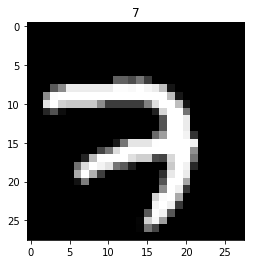

Step: 0 | train loss: 2.3201 | test accuracy: 0.10
Step: 50 | train loss: 0.4150 | test accuracy: 0.45
Step: 100 | train loss: 0.2189 | test accuracy: 0.60
Step: 150 | train loss: 0.2655 | test accuracy: 0.67
Step: 200 | train loss: 0.2139 | test accuracy: 0.72
Step: 250 | train loss: 0.2286 | test accuracy: 0.76
Step: 300 | train loss: 0.1127 | test accuracy: 0.78
Step: 350 | train loss: 0.1047 | test accuracy: 0.80
Step: 400 | train loss: 0.0980 | test accuracy: 0.82
Step: 450 | train loss: 0.1104 | test accuracy: 0.83
Step: 500 | train loss: 0.1933 | test accuracy: 0.85
Step: 550 | train loss: 0.1482 | test accuracy: 0.85


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

BATCH_SIZE = 50
LR = 0.001              # learning rate

mnist = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0])); plt.show()

tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

# CNN
conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)           # -> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2,
)           # -> (14, 14, 16)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (14, 14, 32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (7, 7, 32)
flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32, )
output = tf.layers.dense(flat, 10)              # output layer

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(600):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

RNN 分類

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


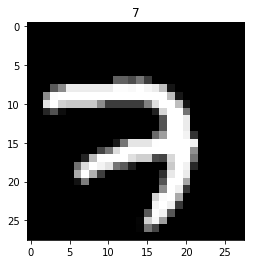

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
train loss: 2.3016 | test accuracy: 0.13
train loss: 0.7720 | test accuracy: 0.40
train loss: 0.6931 | test accuracy: 0.53
train loss: 0.4476 | test accuracy: 0.61
train loss: 0.2765 | test accuracy: 0.67
train loss: 0.2386 | test accuracy: 0.70
train loss: 0.2573 | test accuracy: 0.74
train loss: 0.0561 | test accuracy: 0.76
train loss: 0.1801 | test accuracy: 0.78
train loss: 0.2293 | test accuracy: 0.80
train loss: 0.0929 | test accuracy: 0.81
train loss: 0.2366 | test accuracy: 0.82
train loss: 0.1152 | test accuracy: 0.83
train loss: 0.0892 | test accuracy: 0.84
train loss: 0.1859 | test accuracy: 0.85
train loss: 0.1458 | test accuracy: 0.85
train loss: 0.0285 | test accuracy: 0.86
train loss: 0.2390 | test accuracy: 0.87
train loss: 0.1501 | test accu

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate

# data
mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP * INPUT_SIZE])       # shape(batch, 784)
image = tf.reshape(tf_x, [-1, TIME_STEP, INPUT_SIZE])                   # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])                             # input y

# RNN
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)
outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    image,                      # input
    initial_state=None,         # the initial hidden state
    dtype=tf.float32,           # must given if set initial_state = None
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)
output = tf.layers.dense(outputs[:, -1, :], 10)              # output based on the last output step

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(1200):    # training
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:      # testing
        accuracy_ = sess.run(accuracy, {tf_x: test_x, tf_y: test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)



RNN回歸

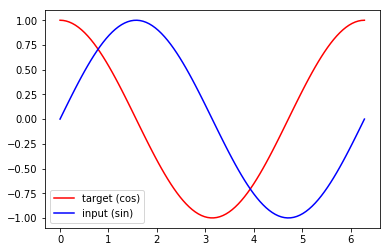

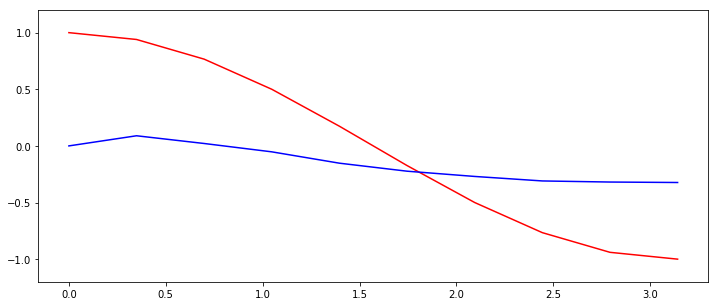

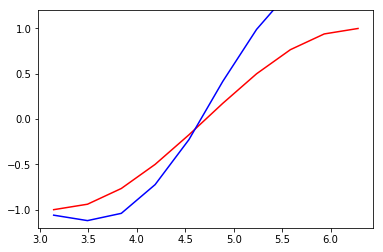

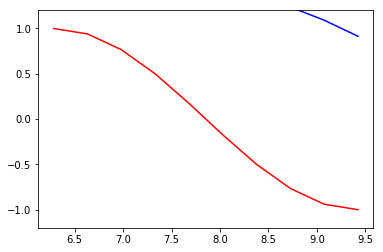

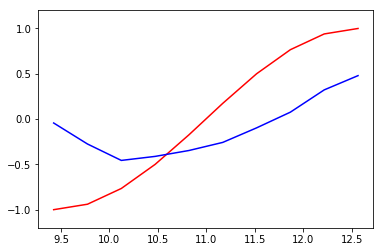

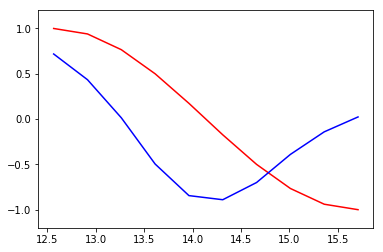

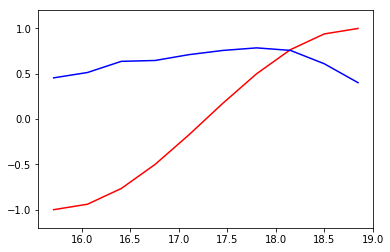

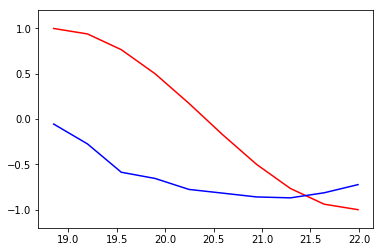

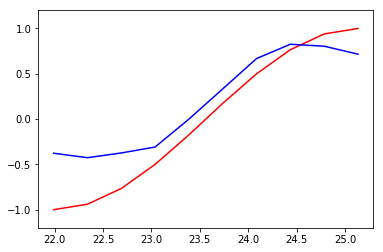

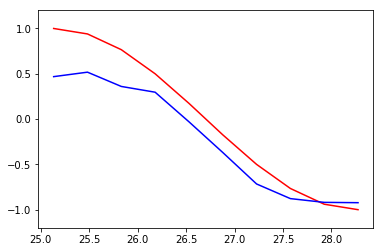

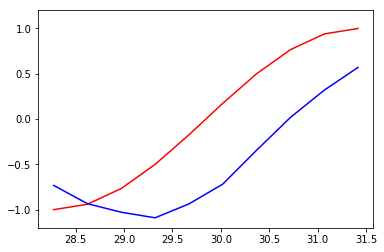

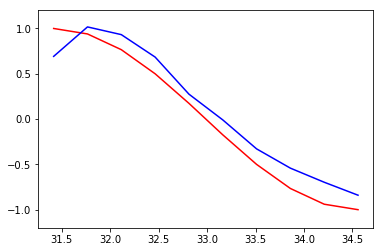

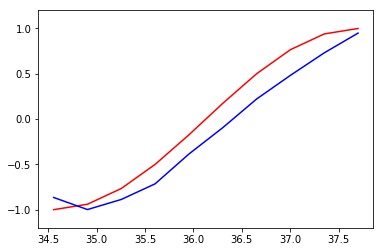

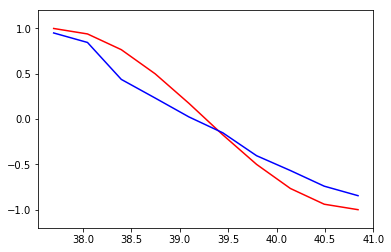

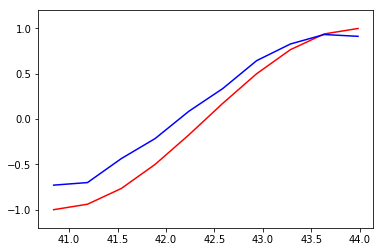

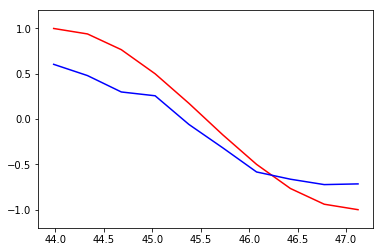

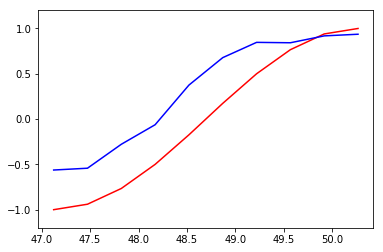

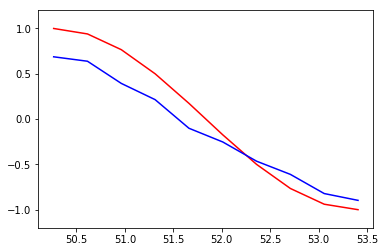

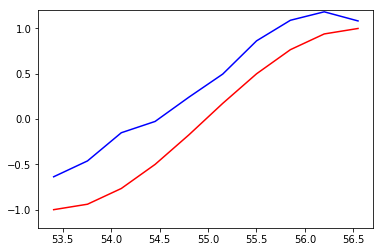

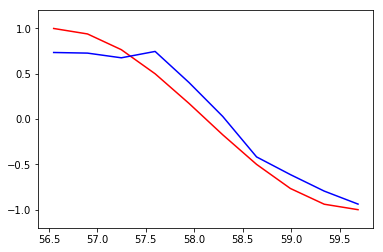

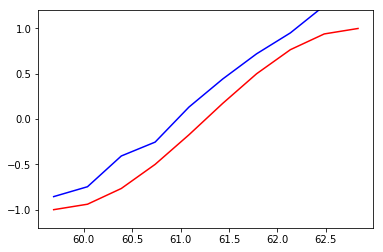

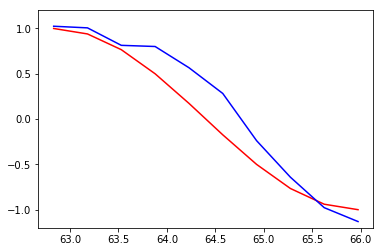

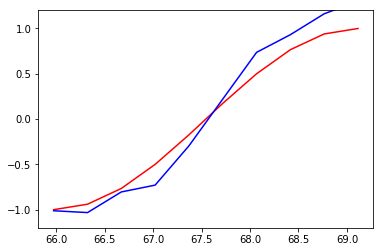

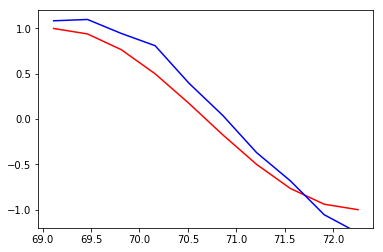

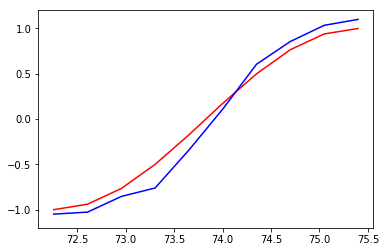

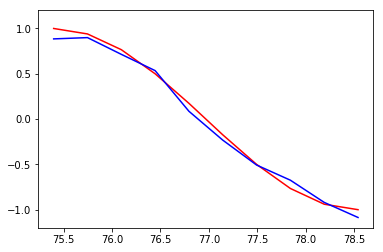

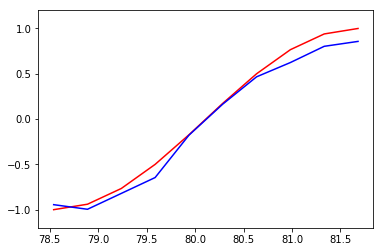

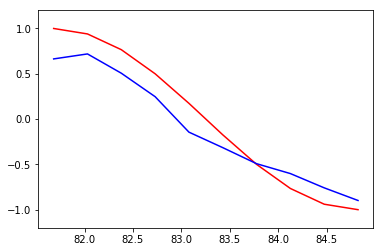

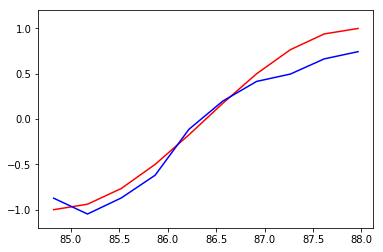

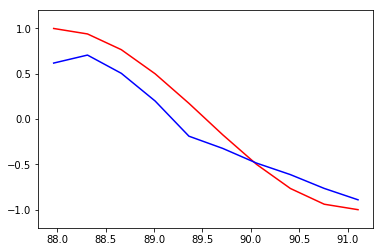

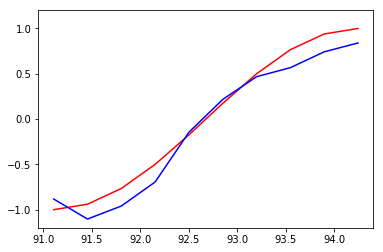

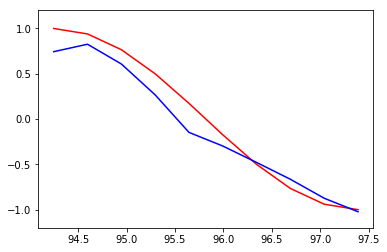

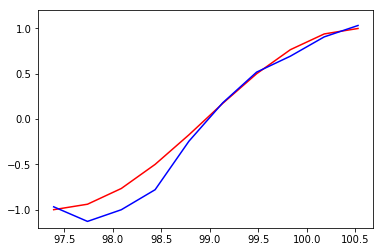

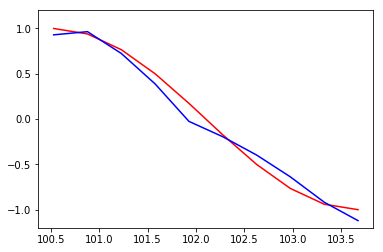

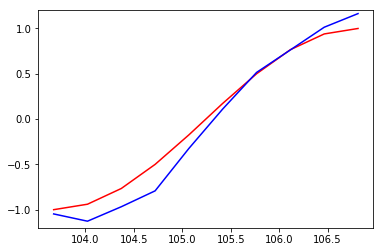

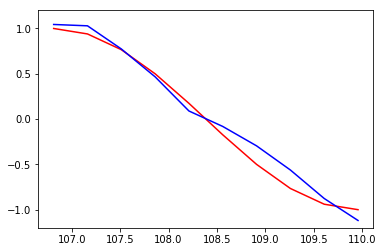

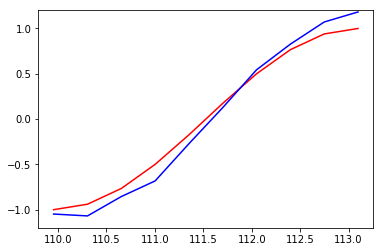

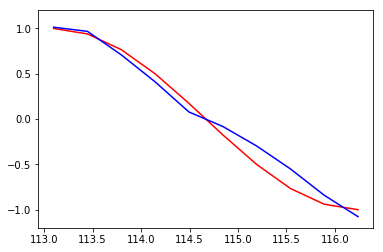

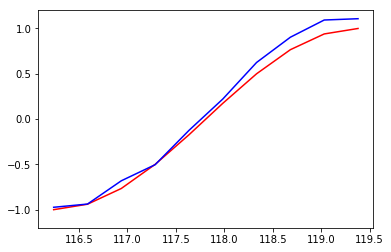

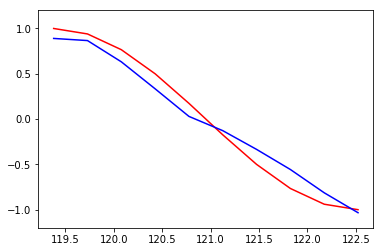

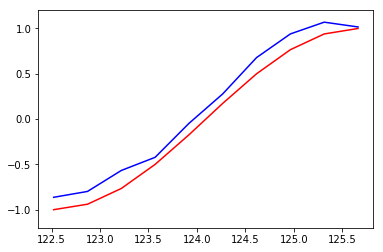

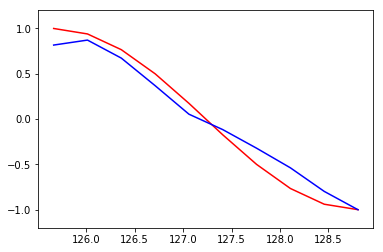

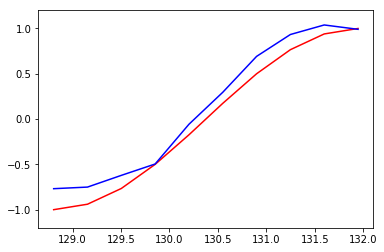

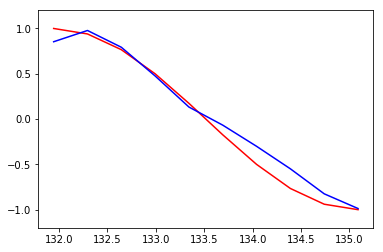

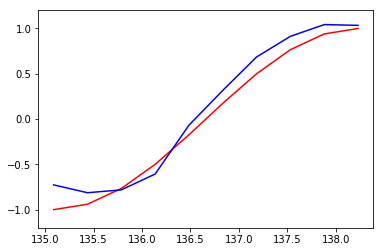

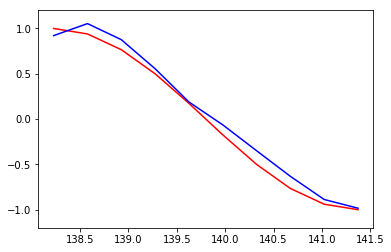

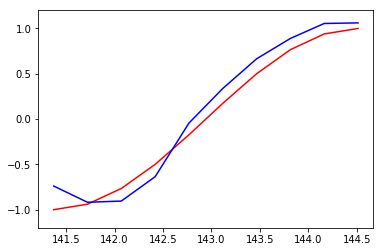

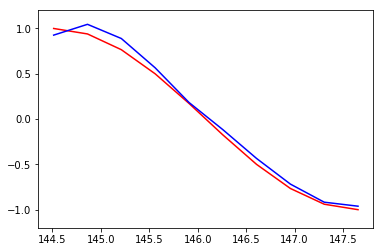

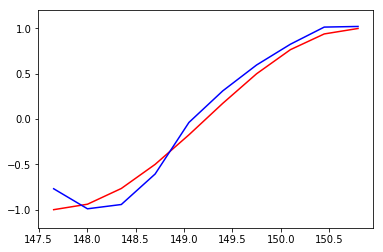

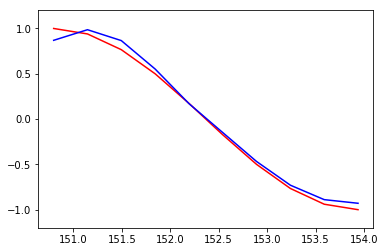

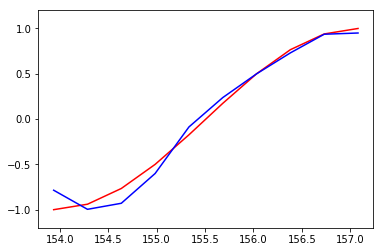

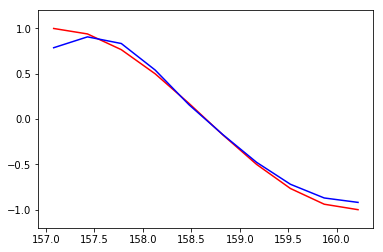

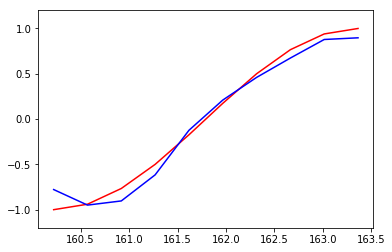

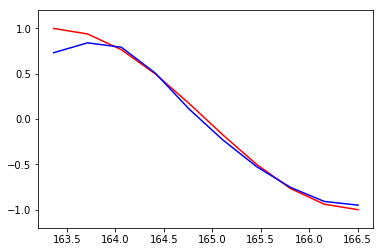

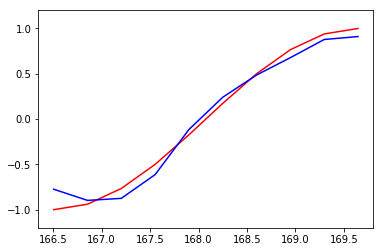

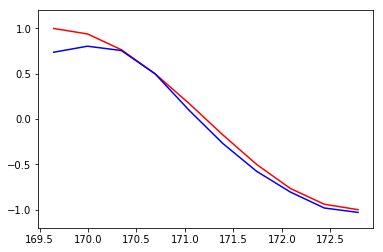

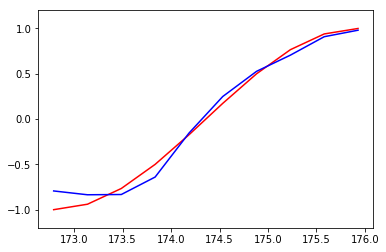

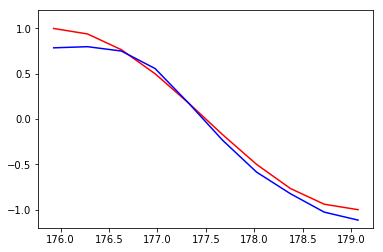

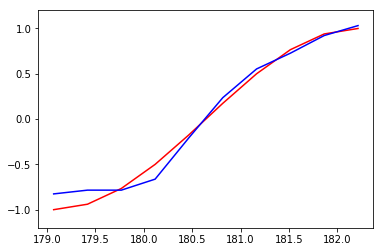

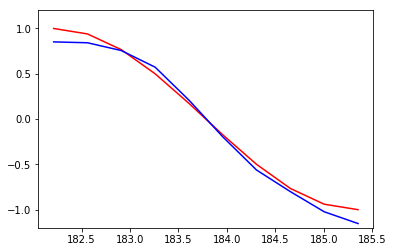

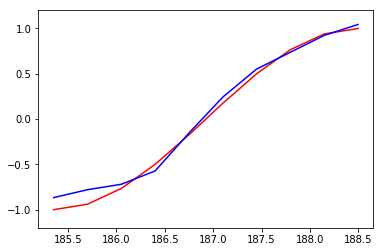

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Hyper Parameters
TIME_STEP = 10       # rnn time step
INPUT_SIZE = 1      # rnn input size
CELL_SIZE = 32      # rnn cell size
LR = 0.02           # learning rate

# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps); y_np = np.cos(steps)    # float32 for converting torch FloatTensor
plt.plot(steps, y_np, 'r-', label='target (cos)'); plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best'); plt.show()

# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])        # shape(batch, 5, 1)
tf_y = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])          # input y

# RNN
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=CELL_SIZE)
init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)    # very first hidden state
outputs, final_s = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    tf_x,                       # input
    initial_state=init_s,       # the initial hidden state
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)
outs2D = tf.reshape(outputs, [-1, CELL_SIZE])                       # reshape 3D output to 2D for fully connected layer
net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])          # reshape back to 3D

loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)  # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())     # initialize var in graph

plt.figure(1, figsize=(12, 5)); plt.ion()       # continuously plot

for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP)
    x = np.sin(steps)[np.newaxis, :, np.newaxis]    # shape (batch, time_step, input_size)
    y = np.cos(steps)[np.newaxis, :, np.newaxis]
    if 'final_s_' not in globals():                 # first state, no any hidden state
        feed_dict = {tf_x: x, tf_y: y}
    else:                                           # has hidden state, so pass it to rnn
        feed_dict = {tf_x: x, tf_y: y, init_s: final_s_}
    _, pred_, final_s_ = sess.run([train_op, outs, final_s], feed_dict)     # train

    # plotting
    plt.plot(steps, y.flatten(), 'r-'); plt.plot(steps, pred_.flatten(), 'b-')
    plt.ylim((-1.2, 1.2)); plt.draw(); plt.pause(0.05)

plt.ioff(); plt.show()